In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection & Analysis

In [ ]:
# loading the data from csv file to a Pandas DataFrame
parkinsons_data = pd.read_csv('parkinsons.csv')

In [ ]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# number of rows and columns in the dataframe
parkinsons_data.shape

(195, 24)

In [ ]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# checking for missing values in each column
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

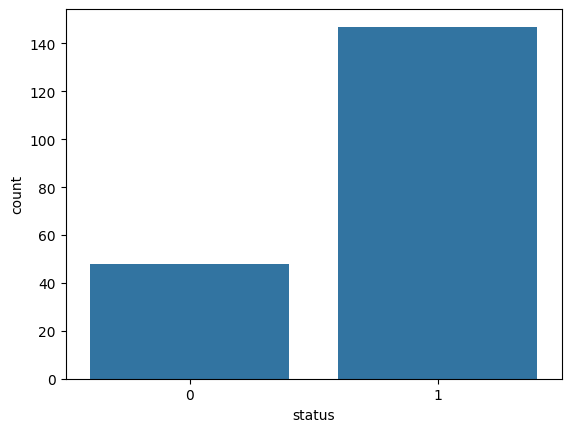

In [ ]:
sns.countplot(x = "status", data = parkinsons_data)

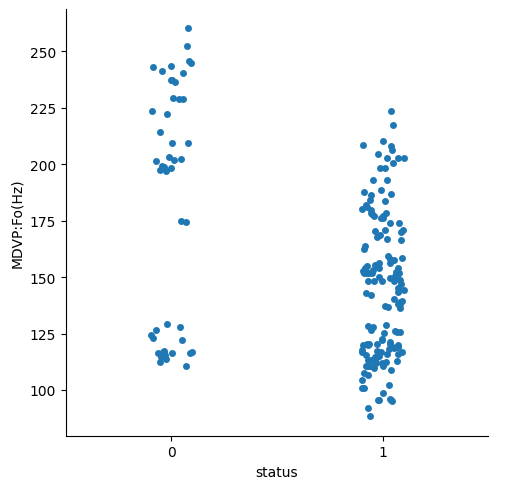

In [ ]:
sns.catplot(x = "status", y = "MDVP:Fo(Hz)", data = parkinsons_data)

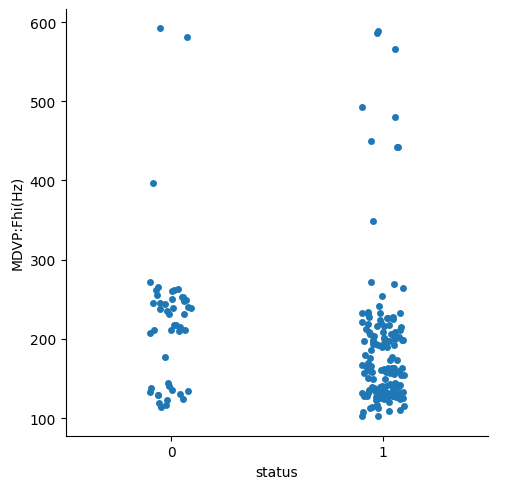

In [ ]:
sns.catplot(x = "status", y = "MDVP:Fhi(Hz)", data = parkinsons_data)

1 --> Parkinsons positive
0 --> Parkinsons negative

In [ ]:

X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)


     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Splitting the data into traing and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()

In [ ]:
model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)


In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [ ]:
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)


In [ ]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracies={}

In [ ]:
y_pred7 = xgb.predict(X_test)

acc7=accuracy_score(Y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(Y_train, xgb.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred7)*100,"%")

Training accuracy score of the model is: 98.71794871794873 %
Testing accuracy score of the model is: 82.05128205128204 %


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, median_absolute_error


SVM

In [ ]:
svm_model = svm.SVC(kernel = "linear")

In [ ]:
svm_model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, Y_train)

y_pred2 = svc.predict(X_test)

acc2=accuracy_score(Y_test,y_pred2)
accuracies['SVM']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, svc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 81.41025641025641 %
Testing accuracy score of the model is: 84.61538461538461 %


In [ ]:
print("Classification Report")
print(classification_report(Y_test,X_test_prediction))
print("Confusion Matrix")
print(confusion_matrix(Y_test, X_test_prediction))

Classification Report
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.96      0.87      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.87      0.83        39
weighted avg       0.90      0.87      0.88        39

Confusion Matrix
[[ 7  1]
 [ 4 27]]


<Axes: >

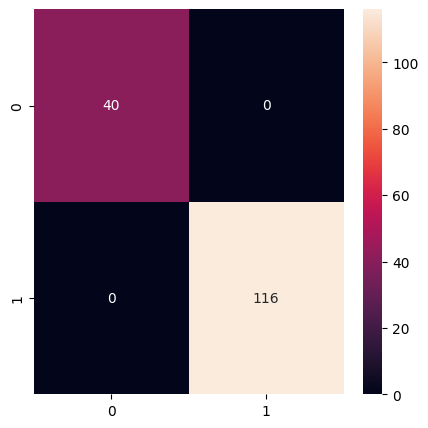

In [ ]:
plt.figure(figsize = (5,5))

sns.heatmap(confusion_matrix(X_train_prediction, Y_train), annot = True, fmt = "g")

LogisticRegression

In [ ]:
logistic_model = LogisticRegression()

In [ ]:
logistic_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
accuracies={}
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

acc=accuracy_score(Y_test,y_pred)
accuracies['LR']=acc*100
print("Training accuracy score of the model is:",accuracy_score(Y_train, lr.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred)*100,"%")

Training accuracy score of the model is: 87.82051282051282 %
Testing accuracy score of the model is: 87.17948717948718 %


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

y_pred3 = dtc.predict(X_test)

acc3=accuracy_score(Y_test,y_pred3)
accuracies['DT']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(Y_train, dtc.predict(X_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(Y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 71.7948717948718 %


In [ ]:
print("Confusion matrix of the model",confusion_matrix(Y_test,y_pred3))

print("Classification Report",classification_report(Y_test,y_pred3))

Confusion matrix of the model [[ 7  1]
 [10 21]]
Classification Report               precision    recall  f1-score   support

           0       0.41      0.88      0.56         8
           1       0.95      0.68      0.79        31

    accuracy                           0.72        39
   macro avg       0.68      0.78      0.68        39
weighted avg       0.84      0.72      0.74        39



In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',  'SVM',  'Decision Tree','XgBoost'],
    'Score': [acc7, acc2, acc3, acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,XgBoost,0.871795
1,SVM,0.846154
0,Logistic Regression,0.820513
2,Decision Tree,0.717949


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


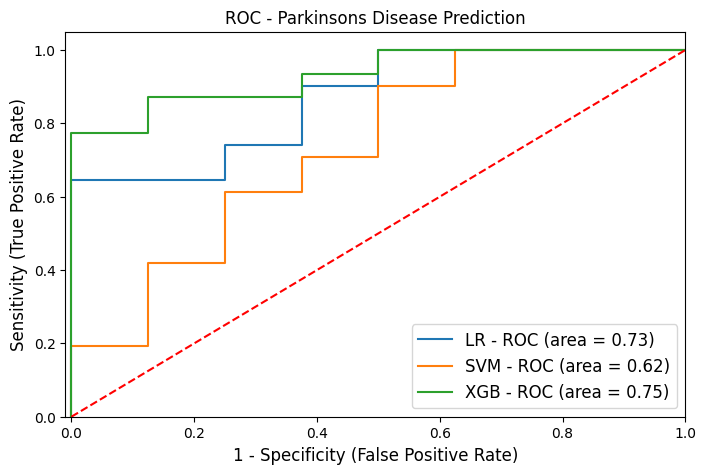

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
##    'label': 'DT',
#    'model': dtc,
#},
{
    'label': 'SVM',
    'model': svc,
},

{
    'label': 'XGB',
    'model': xgb,
}
]
for m in models:
    model = m['model']
    model.fit(X_train, Y_train)
    y_pred=model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Parkinsons Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_heart.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


In [ ]:
import pickle

In [ ]:
filename = 'parkinsons_model_xgboost.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('parkinsons_model_xgboost.sav', 'rb'))

In [ ]:
for column in X.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
